In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,make_scorer,classification_report,roc_auc_score,roc_curve,
                             average_precision_score,precision_recall_curve, roc_auc_score)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import math
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
mydata = pd.read_csv("dataset_for_zain-Copy1.csv")

In [3]:
mydata.head(5)

,repeat_user,minutes_content_consumed,search_num,distinct_number_of_videos_consumed,asset_completion_rate,course_completion_rate,first_asset_minutes_spent,time_of_day,day_of_week
0,repeat_user,49.400000,1.0,7.0,0.888889,1.0,0.866667,Night,Tuesday
1,not_repeat,34.133333,1.0,6.0,0.857143,1.0,0.000000,Afternoon,Tuesday
2,not_repeat,0.033333,0.0,0.0,0.000000,NaN,0.033333,Morning,Thursday
3,not_repeat,83.933333,3.0,0.0,0.000000,NaN,83.933333,Night,Friday
4,not_repeat,1.183333,5.0,1.0,0.000000,0.0,0.450000,Afternoon,Tuesday


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
repeat_user                           20000 non-null object
minutes_content_consumed              17500 non-null float64
search_num                            19998 non-null float64
distinct_number_of_videos_consumed    19000 non-null float64
asset_completion_rate                 19707 non-null float64
course_completion_rate                14225 non-null float64
first_asset_minutes_spent             19639 non-null float64
time_of_day                           16800 non-null object
day_of_week                           18200 non-null object
dtypes: float64(6), object(3)
memory usage: 1.4+ MB


In [5]:
mydata['repeat_user'].value_counts(normalize=True)

not_repeat     0.5304
repeat_user    0.4696
Name: repeat_user, dtype: float64

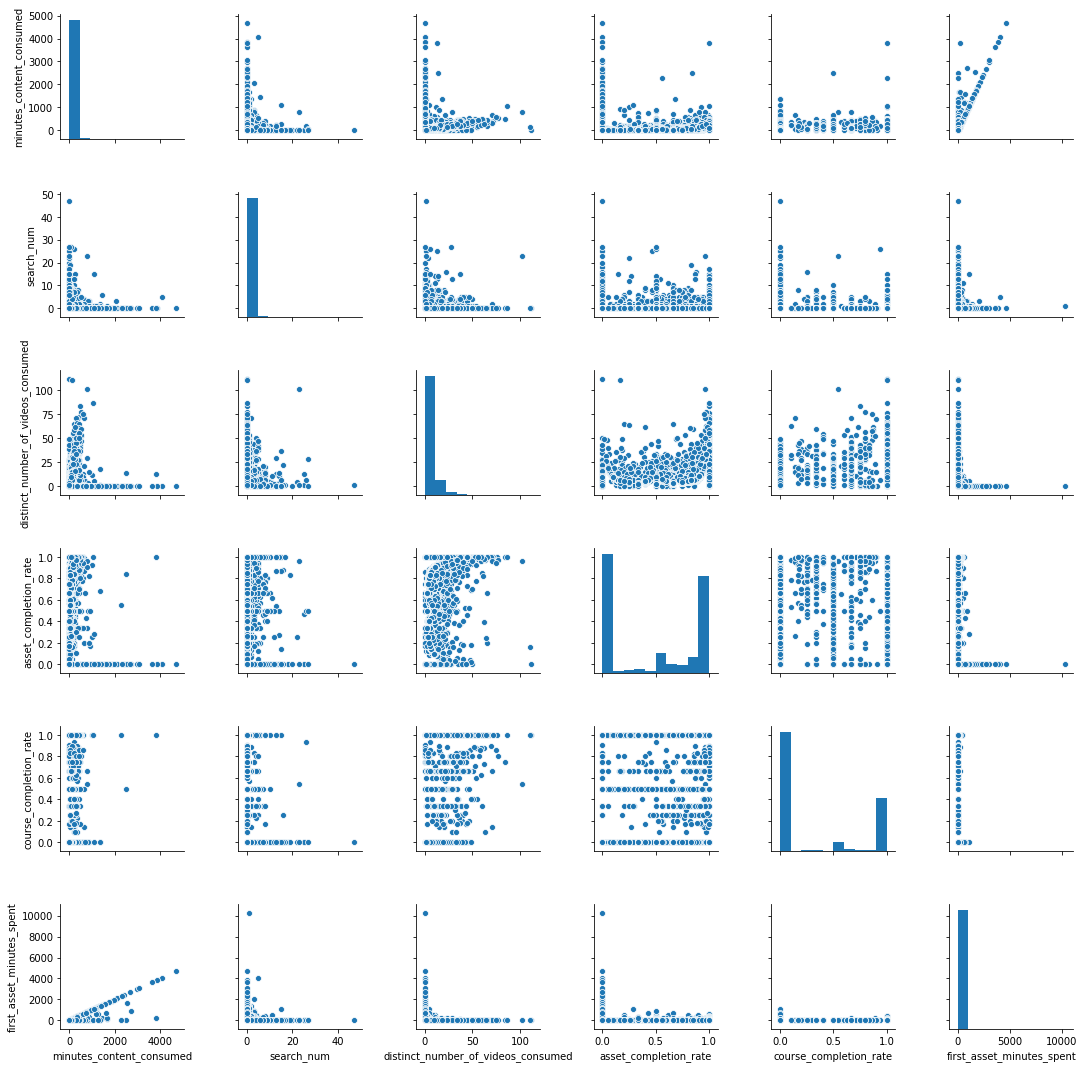

In [6]:
sns.pairplot(mydata, hue=None)

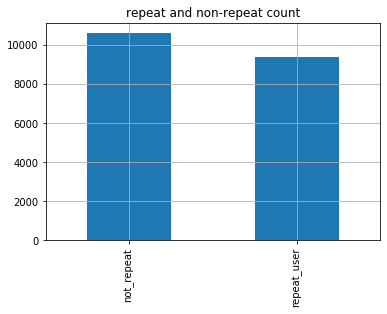

In [7]:
mydata['repeat_user'].value_counts().plot(kind='bar', title='repeat and non-repeat count',grid=True,)
plt.show()

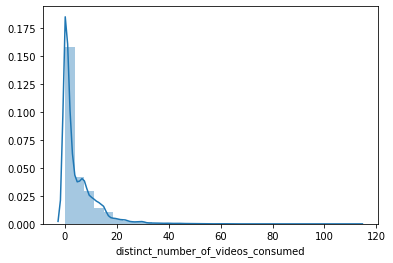

In [8]:
sns.distplot(mydata["distinct_number_of_videos_consumed"], bins=30)

In [9]:
mydata['distinct_number_of_videos_consumed'].value_counts(normalize=True)

0.0     0.305105
1.0     0.143526
2.0     0.089684
3.0     0.053158
7.0     0.045158
          ...   
58.0    0.000053
68.0    0.000053
70.0    0.000053
63.0    0.000053
61.0    0.000053
Name: distinct_number_of_videos_consumed, Length: 79, dtype: float64

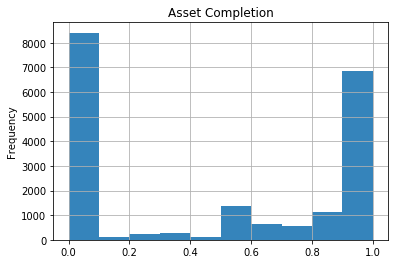

In [10]:
mydata['asset_completion_rate'].plot(kind='hist',title='Asset Completion',alpha=0.90,grid=True)
plt.show()

In [11]:
mydata['asset_completion_rate'].value_counts(normalize=True)

0.000000    0.424113
1.000000    0.307556
0.500000    0.059522
0.666667    0.027249
0.750000    0.018369
              ...   
0.911111    0.000051
0.175000    0.000051
0.740741    0.000051
0.843750    0.000051
0.730769    0.000051
Name: asset_completion_rate, Length: 252, dtype: float64

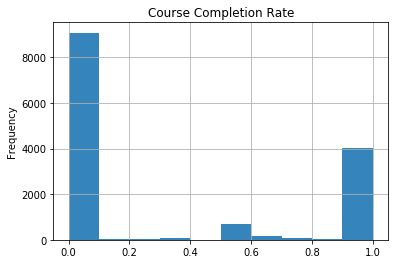

In [12]:
mydata['course_completion_rate'].plot(kind='hist',title='Course Completion Rate',alpha=0.90,grid=True)
plt.show()

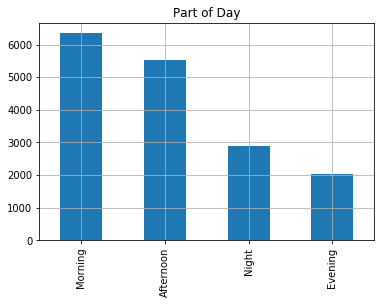

In [13]:
mydata['time_of_day'].value_counts().plot(kind='bar', title='Part of Day',grid=True,)
plt.show()

### Bi-Variate Analysis

In [15]:
new_data = mydata

In [37]:
new_data.head()

,repeat_user,minutes_content_consumed,search_num,distinct_number_of_videos_consumed,asset_completion_rate,course_completion_rate,first_asset_minutes_spent,time_of_day,day_of_week,user_status,time_in_day,day_in_week
0,repeat_user,49.400000,1.0,7.0,0.888889,1.0,0.866667,Night,Tuesday,1,4.0,2.0
1,not_repeat,34.133333,1.0,6.0,0.857143,1.0,0.000000,Afternoon,Tuesday,0,2.0,2.0
2,not_repeat,0.033333,0.0,0.0,0.000000,NaN,0.033333,Morning,Thursday,0,1.0,4.0
3,not_repeat,83.933333,3.0,0.0,0.000000,NaN,83.933333,Night,Friday,0,4.0,5.0
4,not_repeat,1.183333,5.0,1.0,0.000000,0.0,0.450000,Afternoon,Tuesday,0,2.0,2.0


In [28]:
# created a dummy int variable for o/p for clear bi-variate analysis.

new_data["user_status"] = new_data["repeat_user"] 
new_data["user_status"].replace(["repeat_user", "not_repeat"], [1,0], inplace=True)

new_data["time_in_day"] = new_data["time_of_day"]
new_data["time_in_day"].replace(['Night', 'Afternoon', 'Morning', 'Evening'], [4,2,1,3], inplace=True)

new_data["day_in_week"] = new_data["day_of_week"]
new_data["day_in_week"].replace(['Tuesday', 'Thursday', 'Friday', 'Monday', 'Wednesday', 'Saturday',
       'Sunday'], [2, 4, 5, 1, 3, 6, 7], inplace=True)

In [31]:
mydata.drop(["user_status","time_in_day","day_in_week"], axis=1, inplace=True)

In [36]:
mydata.head()

,repeat_user,minutes_content_consumed,search_num,distinct_number_of_videos_consumed,asset_completion_rate,course_completion_rate,first_asset_minutes_spent,time_of_day,day_of_week,user_status,time_in_day,day_in_week
0,repeat_user,49.400000,1.0,7.0,0.888889,1.0,0.866667,Night,Tuesday,1,4.0,2.0
1,not_repeat,34.133333,1.0,6.0,0.857143,1.0,0.000000,Afternoon,Tuesday,0,2.0,2.0
2,not_repeat,0.033333,0.0,0.0,0.000000,NaN,0.033333,Morning,Thursday,0,1.0,4.0
3,not_repeat,83.933333,3.0,0.0,0.000000,NaN,83.933333,Night,Friday,0,4.0,5.0
4,not_repeat,1.183333,5.0,1.0,0.000000,0.0,0.450000,Afternoon,Tuesday,0,2.0,2.0


In [34]:
new_data["user_status"] = new_data["repeat_user"] 
new_data["user_status"].replace(["repeat_user", "not_repeat"], [1,0], inplace=True)

new_data["time_in_day"] = new_data["time_of_day"]
new_data["time_in_day"].replace(['Night', 'Afternoon', 'Morning', 'Evening'], [4,2,1,3], inplace=True)

new_data["day_in_week"] = new_data["day_of_week"]
new_data["day_in_week"].replace(['Tuesday', 'Thursday', 'Friday', 'Monday', 'Wednesday', 'Saturday',
       'Sunday'], [2, 4, 5, 1, 3, 6, 7], inplace=True)

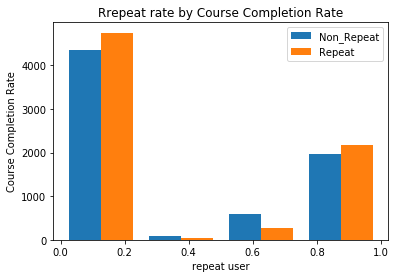

In [35]:
usertype = sorted(new_data['user_status'].unique())
usertype_max=max(usertype)
usertype_repeat=new_data[new_data['user_status']==1]['course_completion_rate']
usertype_non_repeat=new_data[new_data['user_status']==0]['course_completion_rate']
plt.hist([usertype_repeat,usertype_non_repeat],bins=usertype_max+3,range=(0, usertype_max),stacked=False)
plt.legend(('Non_Repeat', 'Repeat'), loc='best')
plt.xlabel('repeat user')
plt.ylabel('Course Completion Rate')
plt.title('Rrepeat rate by Course Completion Rate')
plt.show()

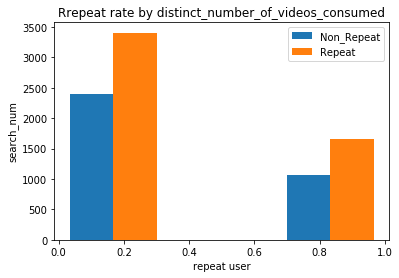

In [38]:
usertype = sorted(mydata['user_status'].unique())
usertype_max=max(usertype)
usertype_repeat=mydata[mydata['user_status']==1]['distinct_number_of_videos_consumed']
usertype_non_repeat=mydata[mydata['user_status']==0]['distinct_number_of_videos_consumed']
plt.hist([usertype_repeat,usertype_non_repeat],bins=usertype_max+2,range=(0, usertype_max),stacked=False)
plt.legend(('Non_Repeat', 'Repeat'), loc='best')
plt.xlabel('repeat user')
plt.ylabel('search_num')
plt.title('Rrepeat rate by distinct_number_of_videos_consumed')
plt.show()

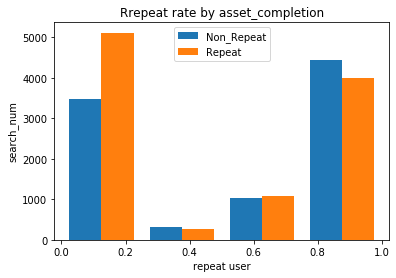

In [39]:
usertype = sorted(mydata['user_status'].unique())
usertype_max=max(usertype)
usertype_repeat=mydata[mydata['user_status']==1]['asset_completion_rate']
usertype_non_repeat=mydata[mydata['user_status']==0]['asset_completion_rate']
plt.hist([usertype_repeat,usertype_non_repeat],bins=usertype_max+3,range=(0, usertype_max),stacked=False)
plt.legend(('Non_Repeat', 'Repeat'), loc='best')
plt.xlabel('repeat user')
plt.ylabel('search_num')
plt.title('Rrepeat rate by asset_completion')
plt.show()

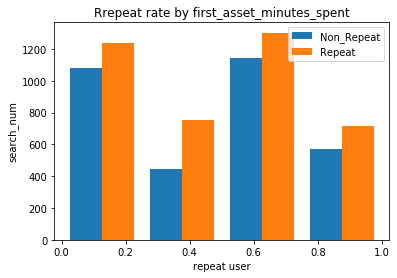

In [40]:
usertype = sorted(mydata['user_status'].unique())
usertype_max=max(usertype)
usertype_repeat=mydata[mydata['user_status']==1]['first_asset_minutes_spent']
usertype_non_repeat=mydata[mydata['user_status']==0]['first_asset_minutes_spent']
plt.hist([usertype_repeat,usertype_non_repeat],bins=usertype_max+3,range=(0, usertype_max),stacked=False)
plt.legend(('Non_Repeat', 'Repeat'), loc='best')
plt.xlabel('repeat user')
plt.ylabel('search_num')
plt.title('Rrepeat rate by first_asset_minutes_spent')
plt.show()

In [41]:
values = new_data.values

print(new_data.isnull().sum())

repeat_user                              0
minutes_content_consumed              2500
search_num                               2
distinct_number_of_videos_consumed    1000
asset_completion_rate                  293
course_completion_rate                5775
first_asset_minutes_spent              361
time_of_day                           3200
day_of_week                           1800
user_status                              0
time_in_day                           3200
day_in_week                           1800
dtype: int64


In [308]:
new_lat_data = pd.read_csv("dataset_for_zain-Copy1.csv")
new_lat_data.head()

,repeat_user,minutes_content_consumed,search_num,distinct_number_of_videos_consumed,asset_completion_rate,course_completion_rate,first_asset_minutes_spent,time_of_day,day_of_week
0,repeat_user,49.400000,1.0,7.0,0.888889,1.0,0.866667,Night,Tuesday
1,not_repeat,34.133333,1.0,6.0,0.857143,1.0,0.000000,Afternoon,Tuesday
2,not_repeat,0.033333,0.0,0.0,0.000000,NaN,0.033333,Morning,Thursday
3,not_repeat,83.933333,3.0,0.0,0.000000,NaN,83.933333,Night,Friday
4,not_repeat,1.183333,5.0,1.0,0.000000,0.0,0.450000,Afternoon,Tuesday


In [311]:
new_lat_data.isnull().sum()

repeat_user                              0
minutes_content_consumed              2500
search_num                               2
distinct_number_of_videos_consumed    1000
asset_completion_rate                  293
course_completion_rate                5775
first_asset_minutes_spent              361
time_of_day                           3200
day_of_week                           1800
dtype: int64

In [312]:
new_lat_data["time_of_day"].fillna(new_lat_data["time_of_day"].mode()[0], inplace=True)
new_lat_data["day_of_week"].fillna(new_lat_data["day_of_week"].mode()[0], inplace=True)
new_lat_data["asset_completion_rate"].fillna(new_lat_data["asset_completion_rate"].median(), inplace=True)
new_lat_data["minutes_content_consumed"].fillna(new_lat_data["minutes_content_consumed"].median(), inplace=True)
new_lat_data["distinct_number_of_videos_consumed"].fillna(new_lat_data["distinct_number_of_videos_consumed"].median(), inplace=True)
new_lat_data["course_completion_rate"].fillna(new_lat_data["course_completion_rate"].median(), inplace=True)
new_lat_data["first_asset_minutes_spent"].fillna(new_lat_data["first_asset_minutes_spent"].median(), inplace=True)
new_lat_data["search_num"].fillna(new_lat_data["search_num"].median(), inplace=True)

In [313]:
new_lat_data.isnull().sum()

repeat_user                           0
minutes_content_consumed              0
search_num                            0
distinct_number_of_videos_consumed    0
asset_completion_rate                 0
course_completion_rate                0
first_asset_minutes_spent             0
time_of_day                           0
day_of_week                           0
dtype: int64

In [317]:
week_num = pd.get_dummies(new_lat_data["day_of_week"], drop_first=False)
day_time = pd.get_dummies(new_lat_data["time_of_day"], drop_first=False)

In [318]:
new_lat_data = pd.concat([new_lat_data,week_num,day_time], axis=1)

In [319]:
pd.DataFrame(new_lat_data).head()

,repeat_user,minutes_content_consumed,search_num,distinct_number_of_videos_consumed,asset_completion_rate,course_completion_rate,first_asset_minutes_spent,time_of_day,day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night
0,repeat_user,49.400000,1.0,7.0,0.888889,1.0,0.866667,Night,Tuesday,0,0,0,0,0,1,0,0,0,0,1
1,not_repeat,34.133333,1.0,6.0,0.857143,1.0,0.000000,Afternoon,Tuesday,0,0,0,0,0,1,0,1,0,0,0
2,not_repeat,0.033333,0.0,0.0,0.000000,0.0,0.033333,Morning,Thursday,0,0,0,0,1,0,0,0,0,1,0
3,not_repeat,83.933333,3.0,0.0,0.000000,0.0,83.933333,Night,Friday,1,0,0,0,0,0,0,0,0,0,1
4,not_repeat,1.183333,5.0,1.0,0.000000,0.0,0.450000,Afternoon,Tuesday,0,0,0,0,0,1,0,1,0,0,0


In [169]:
train_data = lat_data2.values

In [320]:
X = new_lat_data.drop(["repeat_user", "time_of_day", "day_of_week"], axis=1)
y = new_lat_data["repeat_user"]

In [321]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

In [323]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)

In [324]:
X_normalized = pd.DataFrame(X_normalized)
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.011146,0.164713,0.071568,0.230536,0.480353,-0.037876,-0.105513,-0.120259,-0.044454,-0.037534,-0.112048,0.398180,-0.112518,-0.156515,-0.085245,-0.241892,0.615861
1,-0.045503,0.188359,0.041993,0.243018,0.549310,-0.045138,-0.120660,-0.137523,-0.050836,-0.042922,-0.128133,0.455341,-0.128671,0.468453,-0.097483,-0.276617,-0.119053
2,-0.128841,-0.067028,-0.213996,-0.340409,-0.178786,-0.048931,-0.131003,-0.149312,-0.055193,-0.046601,0.710452,-0.199922,-0.139701,-0.194326,-0.105839,0.329093,-0.129258
3,0.045147,0.506700,-0.145046,-0.230728,-0.121180,0.096782,0.511366,-0.101203,-0.037410,-0.031586,-0.094293,-0.135507,-0.094689,-0.131714,-0.071737,-0.203562,0.518272
4,-0.078764,0.805752,-0.106589,-0.212520,-0.111617,-0.029953,-0.081786,-0.093216,-0.034457,-0.029093,-0.086852,0.308640,-0.087216,0.317528,-0.066076,-0.187497,-0.080697


In [325]:
X_normalized.columns = X.columns
X_normalized.head()

,minutes_content_consumed,search_num,distinct_number_of_videos_consumed,asset_completion_rate,course_completion_rate,first_asset_minutes_spent,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night
0,-0.011146,0.164713,0.071568,0.230536,0.480353,-0.037876,-0.105513,-0.120259,-0.044454,-0.037534,-0.112048,0.398180,-0.112518,-0.156515,-0.085245,-0.241892,0.615861
1,-0.045503,0.188359,0.041993,0.243018,0.549310,-0.045138,-0.120660,-0.137523,-0.050836,-0.042922,-0.128133,0.455341,-0.128671,0.468453,-0.097483,-0.276617,-0.119053
2,-0.128841,-0.067028,-0.213996,-0.340409,-0.178786,-0.048931,-0.131003,-0.149312,-0.055193,-0.046601,0.710452,-0.199922,-0.139701,-0.194326,-0.105839,0.329093,-0.129258
3,0.045147,0.506700,-0.145046,-0.230728,-0.121180,0.096782,0.511366,-0.101203,-0.037410,-0.031586,-0.094293,-0.135507,-0.094689,-0.131714,-0.071737,-0.203562,0.518272
4,-0.078764,0.805752,-0.106589,-0.212520,-0.111617,-0.029953,-0.081786,-0.093216,-0.034457,-0.029093,-0.086852,0.308640,-0.087216,0.317528,-0.066076,-0.187497,-0.080697


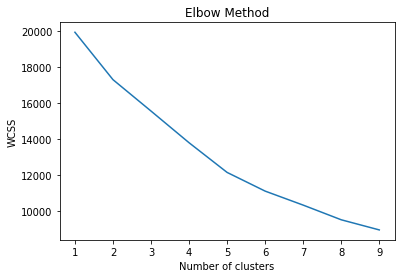

In [328]:
wcss = []
for i in range(1, 10):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_normalized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [241]:
# ac2 = KMeans(n_clusters = 2) 
# ac3 = KMeans(n_clusters = 3) 
# ac4 = KMeans(n_clusters = 4) 
# ac5 = KMeans(n_clusters = 5) 
# ac6 = KMeans(n_clusters = 6) 
# ac7 = KMeans(n_clusters = 7) 

In [242]:
# k = [2, 3, 4, 5, 6, 7]
  
# # Appending the silhouette scores of the different models to the list 
# silhouette_scores = [] 

# silhouette_scores.append(silhouette_score(X_normalized, ac2.fit_predict(X_normalized))) 
# silhouette_scores.append(silhouette_score(X_normalized, ac3.fit_predict(X_normalized)))
# silhouette_scores.append(silhouette_score(X_normalized, ac4.fit_predict(X_normalized)))
# silhouette_scores.append(silhouette_score(X_normalized, ac5.fit_predict(X_normalized)))
# silhouette_scores.append(silhouette_score(X_normalized, ac6.fit_predict(X_normalized)))
# silhouette_scores.append(silhouette_score(X_normalized, ac7.fit_predict(X_normalized)))

# silhouette_scores

[0.11248674027353263,
 0.13734271499547637,
 0.20598496736497865,
 0.24707691072850643,
 0.26131664177030095,
 0.26862333095924296]

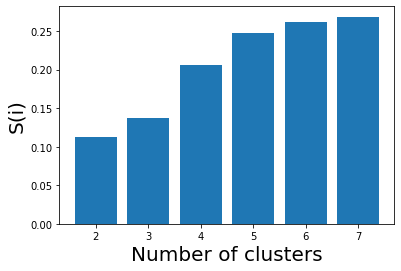

In [243]:
# # Plotting a bar graph to compare the results 
# plt.bar(k, silhouette_scores) 
# plt.xlabel('Number of clusters', fontsize = 20) 
# plt.ylabel('S(i)', fontsize = 20) 
# plt.show() 

In [329]:
Cluster = ac5.fit_predict(X_normalized)
Cluster

array([1, 1, 0, ..., 4, 4, 3])

In [330]:
new_cluster  = Cluster + 1
new_cluster

array([2, 2, 1, ..., 5, 5, 4])

In [331]:
X_normalized_array = X_normalized.values

In [332]:
new_lat_data['Cluster'] = new_cluster

In [334]:
new_lat_data.head()

,repeat_user,minutes_content_consumed,search_num,distinct_number_of_videos_consumed,asset_completion_rate,course_completion_rate,first_asset_minutes_spent,time_of_day,day_of_week,Friday,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night,Cluster
0,repeat_user,49.400000,1.0,7.0,0.888889,1.0,0.866667,Night,Tuesday,0,...,0,0,0,1,0,0,0,0,1,2
1,not_repeat,34.133333,1.0,6.0,0.857143,1.0,0.000000,Afternoon,Tuesday,0,...,0,0,0,1,0,1,0,0,0,2
2,not_repeat,0.033333,0.0,0.0,0.000000,0.0,0.033333,Morning,Thursday,0,...,0,0,1,0,0,0,0,1,0,1
3,not_repeat,83.933333,3.0,0.0,0.000000,0.0,83.933333,Night,Friday,1,...,0,0,0,0,0,0,0,0,1,4
4,not_repeat,1.183333,5.0,1.0,0.000000,0.0,0.450000,Afternoon,Tuesday,0,...,0,0,0,1,0,1,0,0,0,2


### Splitting the i/p and o/p variables for creating the prediction model

In [341]:
X = new_lat_data.drop(["repeat_user","time_of_day", "day_of_week"], axis=1)
y = new_lat_data["repeat_user"]

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Random Forest

In [354]:
RandomForest2 = RandomForestClassifier(n_estimators=800, 
                                      max_depth=4, 
                                      criterion="gini", 
                                      bootstrap=True, )

RandomForest2.fit(X_train,y_train)
predict_y_train = RandomForest2.predict(X_train)

confusion_matrix(y_train, predict_y_train)

print ("RF Accuracy = %.2f" % (accuracy_score(y_train, predict_y_train)))
print(confusion_matrix(y_train, predict_y_train))
print(classification_report(y_train, predict_y_train))

RF Accuracy = 0.61
[[5395 1974]
 [3418 3213]]
              precision    recall  f1-score   support

  not_repeat       0.61      0.73      0.67      7369
 repeat_user       0.62      0.48      0.54      6631

    accuracy                           0.61     14000
   macro avg       0.62      0.61      0.61     14000
weighted avg       0.62      0.61      0.61     14000



In [352]:
predict_y_test = RandomForest2.predict(X_test)

print ("Regression Accuracy = %.2f" % (accuracy_score(y_test, predict_y_test)))
print(confusion_matrix(y_test, predict_y_test))
print(classification_report(y_test, predict_y_test))

Regression Accuracy = 0.62
[[2376  863]
 [1421 1340]]
              precision    recall  f1-score   support

  not_repeat       0.63      0.73      0.68      3239
 repeat_user       0.61      0.49      0.54      2761

    accuracy                           0.62      6000
   macro avg       0.62      0.61      0.61      6000
weighted avg       0.62      0.62      0.61      6000



In [349]:
RandomForest2.feature_importances_

array([0.26262726, 0.31447627, 0.14727939, 0.10755128, 0.05124315,
       0.08325337, 0.00166398, 0.00153398, 0.00279481, 0.00093761,
       0.00129179, 0.0011961 , 0.00263668, 0.00250957, 0.00231437,
       0.00360006, 0.00699851, 0.00609182])

### Baysian Classifier

In [345]:
naive_b = GaussianNB()
naive_b = naive_b.fit(X_train, y_train)


predict_y_train = naive_b.predict(X_train)
confusion_matrix(y_train, predict_y_train)

print ("Naive Bayes Accuracy = %.2f" % (accuracy_score(y_train, predict_y_train)))
print(confusion_matrix(y_train, predict_y_train))
print(classification_report(y_train, predict_y_train))

Naive Bayes Accuracy = 0.57
[[6875  494]
 [5550 1081]]
              precision    recall  f1-score   support

  not_repeat       0.55      0.93      0.69      7369
 repeat_user       0.69      0.16      0.26      6631

    accuracy                           0.57     14000
   macro avg       0.62      0.55      0.48     14000
weighted avg       0.62      0.57      0.49     14000



In [346]:
predict_y_test = naive_b.predict(X_test)

print ("Naive Bayes Accuracy = %.2f" % (accuracy_score(y_test, predict_y_test)))
print(confusion_matrix(y_test, predict_y_test))
print(classification_report(y_test, predict_y_test))

Naive Bayes Accuracy = 0.58
[[3030  209]
 [2295  466]]
              precision    recall  f1-score   support

  not_repeat       0.57      0.94      0.71      3239
 repeat_user       0.69      0.17      0.27      2761

    accuracy                           0.58      6000
   macro avg       0.63      0.55      0.49      6000
weighted avg       0.62      0.58      0.51      6000



### Logistic Regression

In [347]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

predict_y_train = logreg.predict(X_train)
confusion_matrix(y_train, predict_y_train)

print ("Regression Accuracy = %.2f" % (accuracy_score(y_train, predict_y_train)))
print(confusion_matrix(y_train, predict_y_train))
print(classification_report(y_train, predict_y_train))

Regression Accuracy = 0.60
[[5708 1661]
 [3905 2726]]
              precision    recall  f1-score   support

  not_repeat       0.59      0.77      0.67      7369
 repeat_user       0.62      0.41      0.49      6631

    accuracy                           0.60     14000
   macro avg       0.61      0.59      0.58     14000
weighted avg       0.61      0.60      0.59     14000



In [348]:
predict_y_test = logreg.predict(X_test)

print ("Regression Accuracy = %.2f" % (accuracy_score(y_test, predict_y_test)))
print(confusion_matrix(y_test, predict_y_test))
print(classification_report(y_test, predict_y_test))

Regression Accuracy = 0.61
[[2494  745]
 [1603 1158]]
              precision    recall  f1-score   support

  not_repeat       0.61      0.77      0.68      3239
 repeat_user       0.61      0.42      0.50      2761

    accuracy                           0.61      6000
   macro avg       0.61      0.59      0.59      6000
weighted avg       0.61      0.61      0.60      6000



## Bayesian Classification Raw Model

In [213]:
naive_b = GaussianNB()
naive_b = naive_b.fit(X_train, y_train)


predict_y_train = naive_b.predict(X_train)
confusion_matrix(y_train, predict_y_train)

print ("Naive Bayes Accuracy = %.2f" % (accuracy_score(y_train, predict_y_train)))
print(confusion_matrix(y_train, predict_y_train))
print(classification_report(y_train, predict_y_train))

Naive Bayes Accuracy = 0.57
[[6884  485]
 [5566 1065]]
              precision    recall  f1-score   support

  not_repeat       0.55      0.93      0.69      7369
 repeat_user       0.69      0.16      0.26      6631

    accuracy                           0.57     14000
   macro avg       0.62      0.55      0.48     14000
weighted avg       0.62      0.57      0.49     14000



In [217]:
predict_y_test = naive_b.predict(X_test)

print ("Naive Bayes Accuracy = %.2f" % (accuracy_score(y_test, predict_y_test)))
print(confusion_matrix(y_test, predict_y_test))
print(classification_report(y_test, predict_y_test))

Naive Bayes Accuracy = 0.58
[[3032  207]
 [2303  458]]
              precision    recall  f1-score   support

  not_repeat       0.57      0.94      0.71      3239
 repeat_user       0.69      0.17      0.27      2761

    accuracy                           0.58      6000
   macro avg       0.63      0.55      0.49      6000
weighted avg       0.62      0.58      0.50      6000



## Logistic Regression - Raw Model

In [215]:
## Logistic Regression - Raw Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

predict_y_train = logreg.predict(X_train)
confusion_matrix(y_train, predict_y_train)

print ("Regression Accuracy = %.2f" % (accuracy_score(y_train, predict_y_train)))
print(confusion_matrix(y_train, predict_y_train))
print(classification_report(y_train, predict_y_train))


predict_y_test = logreg.predict(X_test)

print ("Regression Accuracy = %.2f" % (accuracy_score(y_test, predict_y_test)))
print(confusion_matrix(y_test, predict_y_test))
print(classification_report(y_test, predict_y_test))

Regression Accuracy = 0.60
[[5651 1718]
 [3834 2797]]
              precision    recall  f1-score   support

  not_repeat       0.60      0.77      0.67      7369
 repeat_user       0.62      0.42      0.50      6631

    accuracy                           0.60     14000
   macro avg       0.61      0.59      0.59     14000
weighted avg       0.61      0.60      0.59     14000



In [218]:
predict_y_test = logreg.predict(X_test)

print ("Regression Accuracy = %.2f" % (accuracy_score(y_test, predict_y_test)))
print(confusion_matrix(y_test, predict_y_test))
print(classification_report(y_test, predict_y_test))

Regression Accuracy = 0.61
[[2496  743]
 [1577 1184]]
              precision    recall  f1-score   support

  not_repeat       0.61      0.77      0.68      3239
 repeat_user       0.61      0.43      0.51      2761

    accuracy                           0.61      6000
   macro avg       0.61      0.60      0.59      6000
weighted avg       0.61      0.61      0.60      6000



## Random Forest - Raw Model

In [191]:
RandomForest2 = RandomForestClassifier(n_estimators=500, 
                                      max_depth=4, 
                                      criterion="gini", 
                                      bootstrap=True, )

RandomForest2.fit(X_train,y_train)
predict_y_train = RandomForest2.predict(X_train)

confusion_matrix(y_train, predict_y_train)

print ("RF Accuracy = %.2f" % (accuracy_score(y_train, predict_y_train)))
print(confusion_matrix(y_train, predict_y_train))
print(classification_report(y_train, predict_y_train))

RF Accuracy = 0.61
[[5512 1857]
 [3539 3092]]
              precision    recall  f1-score   support

  not_repeat       0.61      0.75      0.67      7369
 repeat_user       0.62      0.47      0.53      6631

    accuracy                           0.61     14000
   macro avg       0.62      0.61      0.60     14000
weighted avg       0.62      0.61      0.61     14000



In [219]:
predict_y_test = RandomForest2.predict(X_test)

print ("Regression Accuracy = %.2f" % (accuracy_score(y_test, predict_y_test)))
print(confusion_matrix(y_test, predict_y_test))
print(classification_report(y_test, predict_y_test))

Regression Accuracy = 0.62
[[2414  825]
 [1458 1303]]
              precision    recall  f1-score   support

  not_repeat       0.62      0.75      0.68      3239
 repeat_user       0.61      0.47      0.53      2761

    accuracy                           0.62      6000
   macro avg       0.62      0.61      0.61      6000
weighted avg       0.62      0.62      0.61      6000



### Finding the Significant features from RF model to build a new model

In [223]:
RandomForest2.feature_importances_

array([0.26573163, 0.33054961, 0.12631426, 0.10553539, 0.06025801,
       0.08214183, 0.00192006, 0.00156702, 0.00258341, 0.00083437,
       0.00130802, 0.00306818, 0.00337175, 0.00267807, 0.00275391,
       0.00246378, 0.00692072])

- Based on the above feature importance removing all the features which has less than 10% importance

In [224]:
X2 = lat_data2.drop(["repeat_user", "time_of_day", "day_of_week", 'course_completion_rate', 'first_asset_minutes_spent', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Afternoon', 'Evening', 'Morning', 'Night'], axis=1)
y2 = lat_data2["repeat_user"]

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

### Building RF again with reduced features

In [227]:
RandomForest3 = RandomForestClassifier(n_estimators=800, 
                                      max_depth=4, 
                                      criterion="gini", 
                                      bootstrap=True, )

RandomForest3.fit(X_train,y_train)
predict_y_train = RandomForest3.predict(X_train)

confusion_matrix(y_train, predict_y_train)

print ("RF Accuracy = %.2f" % (accuracy_score(y_train, predict_y_train)))
print(confusion_matrix(y_train, predict_y_train))
print(classification_report(y_train, predict_y_train))

RF Accuracy = 0.61
[[5340 2029]
 [3464 3167]]
              precision    recall  f1-score   support

  not_repeat       0.61      0.72      0.66      7369
 repeat_user       0.61      0.48      0.54      6631

    accuracy                           0.61     14000
   macro avg       0.61      0.60      0.60     14000
weighted avg       0.61      0.61      0.60     14000



In [228]:
predict_y_test = RandomForest3.predict(X_test)

print ("Regression Accuracy = %.2f" % (accuracy_score(y_test, predict_y_test)))
print(confusion_matrix(y_test, predict_y_test))
print(classification_report(y_test, predict_y_test))

Regression Accuracy = 0.61
[[2334  905]
 [1432 1329]]
              precision    recall  f1-score   support

  not_repeat       0.62      0.72      0.67      3239
 repeat_user       0.59      0.48      0.53      2761

    accuracy                           0.61      6000
   macro avg       0.61      0.60      0.60      6000
weighted avg       0.61      0.61      0.60      6000



### Applying KNN to identify if there are any clusters being formed

In [254]:
lat_data2.head()

,repeat_user,minutes_content_consumed,search_num,distinct_number_of_videos_consumed,asset_completion_rate,course_completion_rate,first_asset_minutes_spent,time_of_day,day_of_week,Friday,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night,Cluster
0,repeat_user,49.400000,1.0,7.0,0.888889,1.00000,0.866667,Night,Tuesday,0,...,0,0,0,1,0,0,0,0,1,1
1,not_repeat,34.133333,1.0,6.0,0.857143,1.00000,0.000000,Afternoon,Tuesday,0,...,0,0,0,1,0,1,0,0,0,1
2,not_repeat,0.033333,0.0,0.0,0.000000,0.32427,0.033333,Morning,Thursday,0,...,0,0,1,0,0,0,0,1,0,4
3,not_repeat,83.933333,3.0,0.0,0.000000,0.32427,83.933333,Night,Friday,1,...,0,0,0,0,0,0,0,0,1,2
4,not_repeat,1.183333,5.0,1.0,0.000000,0.00000,0.450000,Afternoon,Tuesday,0,...,0,0,0,1,0,1,0,0,0,1


In [255]:
X = lat_data2.drop(["repeat_user", "time_of_day", "day_of_week"], axis=1)
y = lat_data2["repeat_user"]

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [258]:
RandomForest2 = RandomForestClassifier(n_estimators=500, 
                                      max_depth=4, 
                                      criterion="gini", 
                                      bootstrap=True, )

RandomForest2.fit(X_train,y_train)
predict_y_train = RandomForest2.predict(X_train)

confusion_matrix(y_train, predict_y_train)

print ("RF Accuracy = %.2f" % (accuracy_score(y_train, predict_y_train)))
print(confusion_matrix(y_train, predict_y_train))
print(classification_report(y_train, predict_y_train))

RF Accuracy = 0.61
[[5450 1919]
 [3473 3158]]
              precision    recall  f1-score   support

  not_repeat       0.61      0.74      0.67      7369
 repeat_user       0.62      0.48      0.54      6631

    accuracy                           0.61     14000
   macro avg       0.62      0.61      0.60     14000
weighted avg       0.62      0.61      0.61     14000



In [259]:
RandomForest2.feature_importances_

array([0.26167677, 0.31241036, 0.13017314, 0.11585583, 0.05505427,
       0.08925966, 0.00185885, 0.00177631, 0.00300939, 0.0009767 ,
       0.00138283, 0.00266755, 0.00315761, 0.00273763, 0.00240907,
       0.00187419, 0.00748004, 0.00623978])

In [262]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)

In [263]:
X_normalized = pd.DataFrame(X_normalized)
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.018173,0.151136,0.060977,0.211675,4.153555e-01,-0.035359,-0.096819,-0.110350,-0.040791,-0.034441,-0.102816,0.467691,-0.103247,-0.143618,-0.078221,-0.158346,0.565115,-0.344953
1,-0.049743,0.168703,0.032217,0.217816,4.636326e-01,-0.041103,-0.108073,-0.123176,-0.045532,-0.038444,-0.114766,0.522051,-0.115247,0.419581,-0.087313,-0.176750,-0.106633,-0.385047
2,-0.134251,-0.064256,-0.212478,-0.326130,-2.212750e-16,-0.047686,-0.125573,-0.143123,-0.052905,-0.044669,0.681003,-0.149709,-0.133910,-0.186271,-0.101452,0.442183,-0.123900,0.151796
3,0.038287,0.509438,-0.151057,-0.231857,-1.573116e-16,0.096772,0.514133,-0.101750,-0.037612,-0.031757,-0.094803,-0.106433,-0.095201,-0.132426,-0.072125,-0.146006,0.521076,-0.176075
4,-0.080092,0.752508,-0.103908,-0.198375,-1.572474e-01,-0.028451,-0.076382,-0.087057,-0.032181,-0.027171,-0.081113,0.368969,-0.081453,0.296546,-0.061710,-0.124921,-0.075364,-0.272139


In [264]:
X_normalized.columns = X.columns
X_normalized.head()

,minutes_content_consumed,search_num,distinct_number_of_videos_consumed,asset_completion_rate,course_completion_rate,first_asset_minutes_spent,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night,Cluster
0,-0.018173,0.151136,0.060977,0.211675,4.153555e-01,-0.035359,-0.096819,-0.110350,-0.040791,-0.034441,-0.102816,0.467691,-0.103247,-0.143618,-0.078221,-0.158346,0.565115,-0.344953
1,-0.049743,0.168703,0.032217,0.217816,4.636326e-01,-0.041103,-0.108073,-0.123176,-0.045532,-0.038444,-0.114766,0.522051,-0.115247,0.419581,-0.087313,-0.176750,-0.106633,-0.385047
2,-0.134251,-0.064256,-0.212478,-0.326130,-2.212750e-16,-0.047686,-0.125573,-0.143123,-0.052905,-0.044669,0.681003,-0.149709,-0.133910,-0.186271,-0.101452,0.442183,-0.123900,0.151796
3,0.038287,0.509438,-0.151057,-0.231857,-1.573116e-16,0.096772,0.514133,-0.101750,-0.037612,-0.031757,-0.094803,-0.106433,-0.095201,-0.132426,-0.072125,-0.146006,0.521076,-0.176075
4,-0.080092,0.752508,-0.103908,-0.198375,-1.572474e-01,-0.028451,-0.076382,-0.087057,-0.032181,-0.027171,-0.081113,0.368969,-0.081453,0.296546,-0.061710,-0.124921,-0.075364,-0.272139


In [270]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.30, random_state=42)

In [271]:
RandomForest2 = RandomForestClassifier(n_estimators=1000, 
                                      max_depth=4, 
                                      criterion="gini", 
                                      bootstrap=True, )

RandomForest2.fit(X_train,y_train)
predict_y_train = RandomForest2.predict(X_train)

confusion_matrix(y_train, predict_y_train)

print ("RF Accuracy = %.2f" % (accuracy_score(y_train, predict_y_train)))
print(confusion_matrix(y_train, predict_y_train))
print(classification_report(y_train, predict_y_train))

RF Accuracy = 0.62
[[5562 1807]
 [3496 3135]]
              precision    recall  f1-score   support

  not_repeat       0.61      0.75      0.68      7369
 repeat_user       0.63      0.47      0.54      6631

    accuracy                           0.62     14000
   macro avg       0.62      0.61      0.61     14000
weighted avg       0.62      0.62      0.61     14000



In [272]:
from sklearn.decomposition import PCA 
# fitting PCA
# pca = PCA(n_components=2)
pca = PCA(.90)
inp_scaled_pca = pca.fit_transform(X_normalized) 

In [275]:
X_train, X_test, y_train, y_test = train_test_split(inp_scaled_pca, y, test_size=0.30, random_state=42)

In [276]:
RandomForest2 = RandomForestClassifier(n_estimators=500, 
                                      max_depth=4, 
                                      criterion="gini", 
                                      bootstrap=True, )

RandomForest2.fit(X_train,y_train)
predict_y_train = RandomForest2.predict(X_train)

confusion_matrix(y_train, predict_y_train)

print ("RF Accuracy = %.2f" % (accuracy_score(y_train, predict_y_train)))
print(confusion_matrix(y_train, predict_y_train))
print(classification_report(y_train, predict_y_train))

RF Accuracy = 0.61
[[5881 1488]
 [4041 2590]]
              precision    recall  f1-score   support

  not_repeat       0.59      0.80      0.68      7369
 repeat_user       0.64      0.39      0.48      6631

    accuracy                           0.61     14000
   macro avg       0.61      0.59      0.58     14000
weighted avg       0.61      0.61      0.59     14000

